# Assignment 7 : SVM

- SVM means support vector machines are supervised machine learning models with asssociated learning algorithms that  
  analyze data used for classification and regression analysis. 
- An SVM constrcts a hyperplane or set of hyperplanes in high dimensional space.
- Intuitively a good separatoin achieved by the hyperplane that ahs the largest distance to the nearest training point of  
  of any class.
- SVM is an maximizing the marrgin, which means they find the hyperplane that has the largest perpendicular distance between the hyperplane and the closest samples on either side.  The closest samples on either side are the support vectors.
- Hard margin svm does not allow errors, but soft margin svm will errors.
- In svm regularization term is maximizing the margin and loss term is an Average distance of misclassified points from the correct hyperplane.
- Loss in svm is hinge_loss which means 0-1 loss.
- Linear svm and logistic regression should find the hyperplane in the space of xi's.
- Logistic regression along with feature transformation will also find the hyperplane in an transformed way.
- In logistic regression we did feature transform explicitly but in kernel SVM using kernel trick did feature transform 
  eplicitly.
- RBF(Radial Basis Function) kernel is an general purpose kernel,RBF kernel consisting of two hyperparameters.
- Cases:

          1. Feature transfrom and feature engineering can be done by kernel design, which means this can be internally.
          2. Decision Surface: In linear svm decision surface is hyperplane and kernel svm can converts non linear surface 
             to linear surface using kernel design and finds the hyperplane in linear surface, here dimensions are high.
          3. outliers are not very much impacted by svm.
          4. In RBF SVM consisting of two hyperparameters are C and alpha, if C is large then leads to overfit and if C is 
             small then leads to underfit.
          5. If large dimension then SVM will work good.
          6. training time is very large, if number of datapoints are large.

In [4]:
#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle 
def savetofile(obj,filename):
    pickle.dump(obj,open(filename,"wb"))
    
def openfromfile(filename):
    temp=pickle.load(open(filename,"rb"))
    return temp

In [5]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing


from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [6]:
#Loading the dataset which is an preprocessed data can be done.
data_frame = openfromfile("New_Amazon_preprocess_data")

In [7]:
#Shape of data
print("Shape of data_frame:", data_frame.shape)

#First five rows of the data_frame
data_frame.head()

Shape of data_frame: (364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
515425,515426,141278509X,AB1A5EGHHVA9M,CHelmic,1,1,positive,1332547200,The best drink mix,This product by Archer Farms is the best drink...,product archer farm best drink mix ever mix fl...
24750,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,positive,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,dog love saw pet store tag attach regard made ...
24749,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,negative,1192060800,made in china,My dogs loves this chicken but its a product f...,dog love chicken product china wont buy anymor...
308076,308077,2841233731,A3QD68O22M2XHQ,LABRNTH,0,0,positive,1345852800,Great recipe book for my babycook,This book is easy to read and the ingredients ...,book easi read ingredi avail store unlik recip...
150523,150524,6641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...


In [8]:
#Storing the data_frame based on the time attribute
data_frame.sort_values('Time', inplace=True)

#Reseting the data_frame
data_frame.reset_index(drop=False, inplace=True)

In [9]:
#In the Score attribute consisting of two categories changing positive to 1 and negative to 0
data_frame.Score = [1 if(score == 'positive') else 0 for score in data_frame.Score]

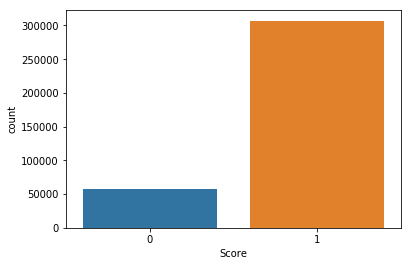

1    307061
0     57110
Name: Score, dtype: int64

In [10]:
#Count plot for score attribute 
sns.countplot(x=data_frame.Score, data=data_frame)
plt.show()
data_frame.Score.value_counts()

In [13]:
#Taking the top 50k datapoints from the dataset
df_50k = data_frame[0:50000]

In [14]:
#Storing the cleanedtext attribute into X and Score attribute into the y
X = df_50k.CleanedText

y = df_50k.Score

In [15]:
#Splitting the data into train as 70% and test as 30%
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [16]:
#shape of train and test data
print("Shape of the train data:", X_tr.shape)

print("Shape of the test data:", X_test.shape)

Shape of the train data: (35000,)
Shape of the test data: (15000,)


# BOW:

 which means makes a vector for each review of length unique words from the whole dataset and makes frequency count of word.
 
- Bow or Bag of Words which means way of extracting features from text for use in modeling.
- A bag-of-words is a representation of text that describes the occurrence of words within a document. 
   
   It involves two things:
                1.vocabulary of known words.
                2.Measure of the presence of known words.
-  It is called a “bag” of words, because any information about the order or structure of words in the document is              discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [17]:

%%time

count_vec = CountVectorizer()
#Making the fit_transform for train data
bow_tr = count_vec.fit_transform(X_tr)

Wall time: 1.22 s


In [18]:
#Transform for test data
bow_test = count_vec.transform(X_test)

In [19]:
#Nomalizing the train and test data
bow_tr = preprocessing.normalize(bow_tr)
bow_test = preprocessing.normalize(bow_test)

In [20]:
#Shape of train and test data after the bag of words
print("shape of train data:", bow_tr.shape)
print("shape of test data:", bow_test.shape)

shape of train data: (35000, 26059)
shape of test data: (15000, 26059)


### 1. Hyperparameter tuning using grid seach and random search cross validation:

**  Grid Search Cross Validation:**

- working through multiple combinations of parameter tunes, cross validate each and determine                                  which one gives the best performance.      
    
- Note: In grid search, if you choosen n paramters then we will have to check 2^n combinations.

![title](grid search cross validation.png)

** Time based splitting:** 

- Provides train/test indices to split time series data samples that are observed at fixed time                                 intervals, in train/test sets.In each split, test indices must be higher than before, and thus shuffling in cross
  validator is inappropriate.

![title](time series split.png)

** Grid Search Cross Validation:**

** Linear SVM with hinge loss:** The hinge loss term ∑max(0,1−yi(w⊺xi+b)) in soft margin SVM penalizes misclassifications. 

- Linear svm will work well if the dataset is linearly separable, if data isn't linearly separable then not work well.
- It consist of only one hyperparameter, training is less as compared to the RBF kernel.

In [21]:
def grid_search(X_train, y_train):  
    parameters = {'C':[0.03125, 0.125, 0.5, 1, 2, 8, 16]}

    #splitting the data based on the time series
    tbs = TimeSeriesSplit(n_splits=3)

    clf = LinearSVC()

    #Grid Search Cross Validation using logistic regression
    gsv = GridSearchCV(clf, parameters,n_jobs=3, cv=tbs, verbose=3)
    gsv.fit(X_train, y_train)

    #Best hyperparameter value
    print("optimal hyperparameter:", gsv.best_params_)
    print("Best Accuracy:", gsv.best_score_ * 100)
    
    return gsv.grid_scores_, gsv.best_estimator_

In [22]:

%%time

#Calling the function for Grid Search Cross Validation
grid_scores, best_estimator = grid_search(bow_tr, y_tr)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:    4.2s finished


optimal hyperparameter: {'C': 1}
Best Accuracy: 92.66285714285715
Wall time: 4.69 s


In [23]:
grid_scores[:2]

[mean: 0.90019, std: 0.00583, params: {'C': 0.03125},
 mean: 0.91768, std: 0.00504, params: {'C': 0.125}]

In [24]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [25]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(bow_test)

In [29]:
#Function for calculating the metrics
def test_metrics(y_test, y_pred):
    cm = pd.DataFrame(confusion_matrix(y_test,y_pred),range(2),range(2))
    sns.set(font_scale=1.5)
    sns.heatmap(cm,annot=True,annot_kws={"size": 20}, fmt='g', vmin=0, vmax=15000)

    print("Accuracy on test data:", round(accuracy_score(y_test, y_pred) * 100 , 2))
    print("Precision on test data:", round(precision_score(y_test, y_pred) * 100 , 2))
    print("Recall on test data:", round(recall_score(y_test, y_pred) * 100 , 2))
    print("F1_score on test data:", round(f1_score(y_test, y_pred) * 100,2))

    plt.show()

Accuracy on test data: 92.52
Precision on test data: 93.73
Recall on test data: 98.08
F1_score on test data: 95.85


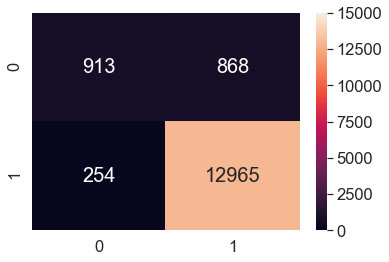

In [30]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

** Random Search cross validation:** 
- implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. 



- This has two main benefits over an exhaustive search:
    1. A budget can be chosen independent of the number of parameters and possible values
    2. Adding parameters that do not influence the performance does not decrease efficiency.
   



- Note: In random search, if you choosen n paramters then we will have to check n combinations.

![title](random search cross validation.png)

In [31]:
#Function for random Search Cross Validation

def random_search(X_train, y_train):
    #Assigning the values for hyperperameter and regularization as l1 and l2
    parameters = {'C':np.arange(1, 10, 0.1)}
    
    #splitting the data based on the time series
    tbs = TimeSeriesSplit(n_splits=3)

    clf = LinearSVC()
    #Random search for hyperparameter tuning
    rsv = RandomizedSearchCV(clf, parameters, scoring='accuracy', n_jobs=3, cv=tbs, verbose=3)

    rsv.fit(X_train, y_train)

    print("optimal hyperparameter:",rsv.best_params_)
    print("Best accuracy:",rsv.best_score_*100)
    return rsv.best_estimator_

In [32]:

%%time

#Calling the function for random search cross validation
best_estimator = random_search(bow_tr, y_tr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    5.9s finished


optimal hyperparameter: {'C': 2.4000000000000012}
Best accuracy: 92.47238095238095
Wall time: 6.53 s


** Testing the model from best_estimator which can be return by the random search cross validation.**

In [33]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=2.4000000000000012, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [34]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(bow_test)

Accuracy on test data: 92.45
Precision on test data: 94.03
Recall on test data: 97.63
F1_score on test data: 95.8


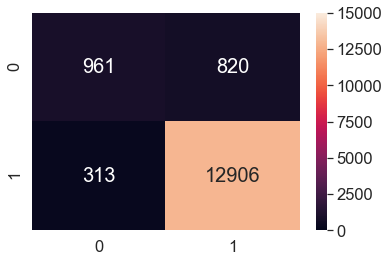

In [35]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

### Top 10 important Features for positive and negative classes:

In [36]:
#Training the model with the optimal parameters
clf =  LinearSVC(C=2.4)
clf.fit(bow_tr, y_tr)

LinearSVC(C=2.4, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [37]:
#Getting the feature names from the count_vec
features = count_vec.get_feature_names()

#Combining coefficient values with the corresponding features
coefs_with_fea = sorted(zip(clf.coef_[0], features))

print("Top 10 positive important features:", [a[1] for a in coefs_with_fea[-10:]])
print("*"*100)
print("Top 10 negative important features:", [a[1] for a in coefs_with_fea[:10]])

Top 10 positive important features: ['awesom', 'delici', 'best', 'perfect', 'beat', 'solv', 'hook', 'amaz', 'skeptic', 'addict']
****************************************************************************************************
Top 10 negative important features: ['worst', 'wors', 'horribl', 'terribl', 'unpleas', 'aw', 'bland', 'gross', 'fallen', 'inferior']


# TFIDF:

TF-IDF stands for term frequency-inverse document frequency. TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

Term_frequency(TF) = (number of times word occur in document) / (Total number of words in the document).

Inverse_Document_freqency(IDF) = log((total number of documents) / In which documents a word occurs))

                   So, TF-IDF(word) = TF(word) * IDF(word)

In [38]:
#Vectorizing the data
tfidf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_tr = tfidf_vect.fit_transform(X_tr)

In [39]:
#Vectorizing the test data
tfidf_test = tfidf_vect.transform(X_test)

In [40]:
#Nomalizing the train and test data
tfidf_tr = preprocessing.normalize(tfidf_tr)
tfidf_test = preprocessing.normalize(tfidf_test)

In [41]:
#Shape of the train and test data
print("Shape of train data:", tfidf_tr.shape)
print("Shape of test data:", tfidf_test.shape)

Shape of train data: (35000, 557454)
Shape of test data: (15000, 557454)


### Hyperparameter tuning using grid seach and random search cross validation:

** Grid Search Cross Validation:**

In [42]:
#Calling the Grid search function
grid_scores, best_estimator = grid_search(tfidf_tr, y_tr)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:    9.2s finished


optimal hyperparameter: {'C': 16}
Best Accuracy: 92.71619047619048


In [43]:
grid_scores[:2]

[mean: 0.89135, std: 0.00398, params: {'C': 0.03125},
 mean: 0.89950, std: 0.00549, params: {'C': 0.125}]

In [44]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=16, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_test)

Accuracy on test data: 92.91
Precision on test data: 93.88
Recall on test data: 98.36
F1_score on test data: 96.07


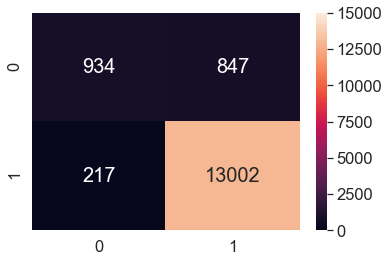

In [46]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

** Random Cross Validation:**

In [47]:
#Calling the function for random search cross validation
best_estimator = random_search(tfidf_tr, y_tr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:   13.7s finished


optimal hyperparameter: {'C': 7.400000000000006}
Best accuracy: 92.70095238095239


In [48]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=7.400000000000006, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [49]:
#Finding the predicted labels for test data
y_pred = best_estimator.predict(tfidf_test)

Accuracy on test data: 92.91
Precision on test data: 93.85
Recall on test data: 98.4
F1_score on test data: 96.07


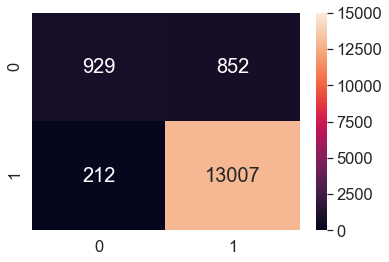

In [50]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

### Top 10 important Features for positive and negative classes:

In [51]:
#Training the model with the optimal parameters
clf =  LinearSVC(C=7.4)
clf.fit(tfidf_tr, y_tr)

LinearSVC(C=7.4, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
#Getting the feature names from the count_vec
features = count_vec.get_feature_names()

#Combining coefficient values with the corresponding features
coefs_with_fea = sorted(zip(clf.coef_[0], features))

print("Top 10 positive important features:", [a[1] for a in coefs_with_fea[-10:]])
print("*"*100)
print("Top 10 negative important features:", [a[1] for a in coefs_with_fea[:10]])

Top 10 positive important features: ['gratest', 'cataton', 'brightest', 'orangina', 'laxaton', 'dateto', 'infam', 'minsth', 'clash', 'namebrand']
****************************************************************************************************
Top 10 negative important features: ['osteoporosi', 'demandif', 'ecstaci', 'themsalt', 'themself', 'toforc', 'irresit', 'diana', 'forgotten', 'particularili']


# Avg_w2v: 
                    
          1. W2V can take the semantic meaning of the words.
          2. W2V can convert each word into an vector.
          3. Avg_W2V means for each review vector should be (W2V(word1) + W2V(word2)--------+ W2V(wordn)/(total no.of words).

In [53]:
#Forming the list_of_words for 50k reviews
sent_words = []
for sent in X:
    sent_words.append(sent.split())

In [54]:
#Splitting the into train and test data
X_tr_w2v, X_test_w2v, y_tr_w2v, y_test_w2v = train_test_split(sent_words, y, test_size=0.3, shuffle=False)

In [55]:
#Word to vectors for train data
w2v = gensim.models.Word2Vec(X_tr_w2v,min_count=5,size=50)

In [56]:
#storing w2v_words which can be return by w2v vocabilary
w2v_words = list(w2v.wv.vocab)
print("total words in w2v",len(w2v_words))
print(w2v_words[0:10])

total words in w2v 7931
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along']


In [57]:
#Function for Avg_w2v
def avg_w2v(data, w2v, w2v_words):
    #creating an empty list
    avg_vectors = []
    row = 0
    for sent in data:
        #creating an vector which size should be 50 and all cells have zero's
        sent_vec = np.zeros(50)
        cnt_words = 0
        for word in sent:
            if word in w2v_words:
                vec = w2v.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
            avg_vectors.append(sent_vec)
        row += 1 
        if cnt_words == 0:
            print(row)
    return avg_vectors

In [58]:

%%time 

#Avg w2v for train data
X_tr_avg_w2v = avg_w2v(X_tr_w2v, w2v, w2v_words)

Wall time: 29.5 s


In [59]:
#Avg w2v for test data
X_test_avg_w2v = avg_w2v(X_test_w2v, w2v, w2v_words)

### Hyperparameter tuning using grid seach and random search cross validation:

** Grid Search Cross Validation:**

In [60]:
#Calling the Grid search function
grid_scores, best_estimator = grid_search(X_tr_avg_w2v, y_tr)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:   32.7s finished


optimal hyperparameter: {'C': 8}
Best Accuracy: 90.35809523809523


In [61]:
grid_scores[:2]

[mean: 0.90282, std: 0.00397, params: {'C': 0.03125},
 mean: 0.90350, std: 0.00373, params: {'C': 0.125}]

In [62]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [65]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(X_test_avg_w2v)

Accuracy on test data: 89.5
Precision on test data: 90.05
Recall on test data: 99.03
F1_score on test data: 94.33


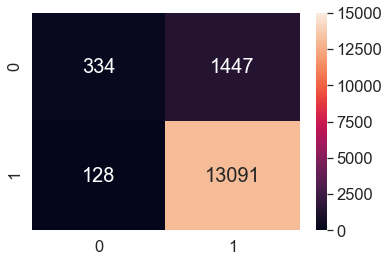

In [66]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

** Random Cross Validation:**

In [67]:
#Calling the function for random search cross validation
best_estimator = random_search(X_tr_avg_w2v, y_tr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:   55.2s finished


optimal hyperparameter: {'C': 6.600000000000005}
Best accuracy: 90.36952380952381


In [70]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=6.600000000000005, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [72]:
#Finding the predicted labels for test data
y_pred = best_estimator.predict(X_test_avg_w2v)

Accuracy on test data: 89.5
Precision on test data: 90.02
Recall on test data: 99.06
F1_score on test data: 94.33


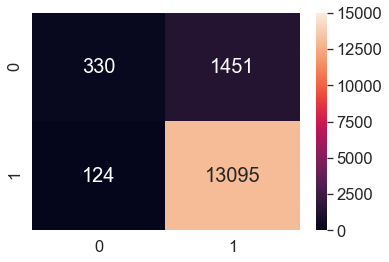

In [73]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

# TFIDF-W2V: 

In [74]:
#Previously done tfidf_w2v with the 50k points
#Getting the train data
tfidf_w2v_tr= openfromfile("tfidf_w2v_train_of_50k_pts")
y_tr_w2v = openfromfile("tfidf_y_tr_w2v_of_50k_pts")

In [75]:
#Getting the test data
tfidf_w2v_test = openfromfile("tfidf_w2v_test_of_50k_pts")
y_test_w2v = openfromfile("tfidf_y_test_w2v_of_50k_pts")

In [76]:
#Shape of the train and test data
print("Length of the train data:", len(tfidf_w2v_tr))
print("Length of the test data:", len(tfidf_w2v_test))

Length of the train data: 35000
Length of the test data: 10164


### Hyperparameter tuning using grid seach and random search cross validation:

** Grid Search Cross Validation:**

In [77]:
#Calling the Grid search function
grid_scores, best_estimator = grid_search(tfidf_w2v_tr, y_tr_w2v )

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=3)]: Done  21 out of  21 | elapsed:   36.6s finished


optimal hyperparameter: {'C': 8}
Best Accuracy: 89.75999999999999


In [78]:
grid_scores[:2]

[mean: 0.89726, std: 0.00443, params: {'C': 0.03125},
 mean: 0.89737, std: 0.00446, params: {'C': 0.125}]

In [79]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [80]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_w2v_test)

Accuracy on test data: 74.25
Precision on test data: 89.62
Recall on test data: 80.1
F1_score on test data: 84.59


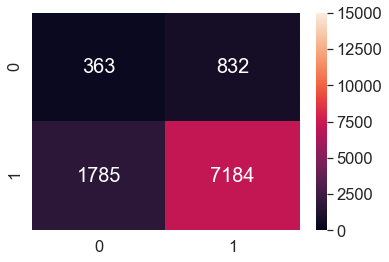

In [82]:
#Calling the function for test metrics
test_metrics(y_test_w2v, y_pred)

** Random Cross Validation:**

In [83]:
#Calling the function for random search cross validation
best_estimator = random_search(tfidf_w2v_tr, y_tr_w2v)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  1.1min finished


optimal hyperparameter: {'C': 9.200000000000006}
Best accuracy: 89.82857142857142


In [84]:
#Result showing the best classifier consisting of parameters
best_estimator

LinearSVC(C=9.200000000000006, class_weight=None, dual=True,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [85]:
#Finding the predicted labels for test data
y_pred = best_estimator.predict(tfidf_w2v_test)

Accuracy on test data: 74.19
Precision on test data: 89.6
Recall on test data: 80.04
F1_score on test data: 84.55


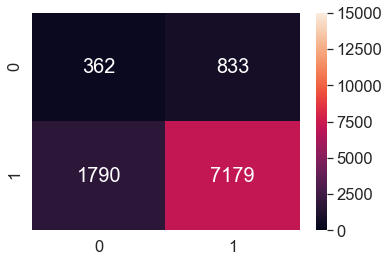

In [86]:
#Calling the function for test metrics
test_metrics(y_test_w2v, y_pred)

#  TFIDF with RBF SVM: 

** TFIDF with Linear svm is worked well for given data, now comparing tfidf with the RBF SVM.**

** RBF SVM:**  RBF kernel is an radial basis function which is an general purpose kernel.
              
              Kernal_rbf(X1, X2) = exp(-(square(X1 - X2)) / 2 * square(sigma) )
              
              where, X1 and X2 are the datapoints.
- As the sigma increases then range of the points will increase and similarity between the points will decease.
- It consist of two parameters are C and gamma, where gammma means 1/sigma.
- C can makes the trade off for misclassification training samples, as C is low then model leads to overfit and as the C is hidh then model leads to underfit.
- It works well if data is in non linear then it can converts into linear by doing the transformations by that the dimensions will increase.
- It can take more time for training the model because to keep track of kernel matrix.

** Grid Search Cross Validation:**

In [88]:
def grid_search(X_train, y_train):  
    parameters = {'C':[0.03125, 0.125, 0.5, 1, 2, 8], 'gamma': [0.03125, 0.125, 0.5, 1, 2, 8]}

    #splitting the data based on the time series
    tbs = TimeSeriesSplit(n_splits=3)

    clf = SVC()

    #Grid Search Cross Validation using logistic regression
    gsv = GridSearchCV(clf, parameters,n_jobs=3, cv=tbs, verbose=3)
    gsv.fit(X_train, y_train)

    #Best hyperparameter value
    print("optimal hyperparameter:", gsv.best_params_)
    print("Best Accuracy:", gsv.best_score_ * 100)
    
    return gsv.grid_scores_, gsv.best_estimator_

In [89]:
#Calling the Grid search function
grid_scores, best_estimator = grid_search(tfidf_tr, y_tr)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 45.5min
[Parallel(n_jobs=3)]: Done 108 out of 108 | elapsed: 290.4min finished


optimal hyperparameter: {'C': 8, 'gamma': 0.125}
Best Accuracy: 92.60571428571428


In [93]:
savetofile(grid_scores, 'grid_scores')

In [92]:
savetofile(best_estimator, 'best_estimator')

In [94]:
#Result showing the best classifier consisting of parameters
best_estimator

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
#Finding the predicted values for test labels using the test data
y_pred = best_estimator.predict(tfidf_test)

Accuracy on test data: 92.88
Precision on test data: 93.66
Recall on test data: 98.6
F1_score on test data: 96.06


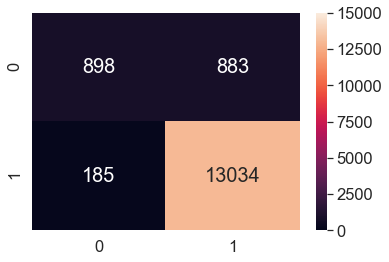

In [96]:
#Calling the function for test metrics
test_metrics(y_test, y_pred)

# Summary: 

** Performance Table: **
                   
                         
                         
                                         __ Linear SVM with Hinge Loss __

|Featurization  |sample size|CV           |Accuracy        |   F1-score  |C        
|---------------|-----------|-------------|----------------|-------------|
|               |           |             |Test accuracy   |Test f1-score|       
| BOW           |50k        |Grid Search  |92.52%          |95.85%       |01    
|               |           |Ramdom Search|92.45%          |95.80%       |2.4                
|TF-IDF         |50k        |Grid Search  |92.91%          |96.07%       |16   
|               |           |Random Search|92.91%          |96.07%       |7.4   
|Avg-W2V        |50k        |Grid Search  |89.50%          |94.33%       |08  
|               |           |Random Search|89.50%          |94.33%       |6.6   
|TF-IDF W2V     |50k        |Grid Search  |74.25%          |84.59%       |08    
|               |           |Random Search|74.19%          |84.55%       |9.2  


                                                     
                                                     
                                                     
                                                     
                                                     ___  RBF SVM ___
                                   

|Featurization |sample size       |CV                  |Test accuracy   |Test F1 score | C | gamma
|--------------|------------------|--------------------|----------------|--------------|---|-------
| TF-IDF       | 50k              |Grid Search         |92.88           |96.06         | 8 | 0.125

**Observation:** 

- For the given dataset using linear svm tfidf is working well as compared to all classification techniques.
- TFIDF is comparing with both linear svm and RBF svm, among that linear svm is working good for the given dataset.
- Training time for RBF svm is more as comparing to the Linear svm. 